In [1]:
!pip install pyspark

In [2]:
!pip install pandas

In [6]:
import pandas as pd
from pyspark.sql import SparkSession

# Memuat dataset dari file CSV
dataset = pd.read_csv('/content/Rental_Properties.csv')

# Menampilkan 5 baris pertama dari dataset
print(dataset.head(5))

   Id          City State            Street_Address    Zip House_Type  Beds  \
0   1     Marlinton    WV              805 10th Ave  24954  Apartment     1   
1   2  Sylvan Grove    KS  312 N. Pennsylvania Ave.  67481  Apartment     1   
2   3     Ishpeming    MI      550 Cleveland Avenue  49849  Apartment     1   
3   4        Glasco    KS             410 N. Fisher  67445  Apartment     1   
4   5      Florence    AL    1032 North Wood Avenue  35630  Apartment     1   

   Baths  Sqft  Price Security_Deposit   Pets  Smoking_Ind   Pool  Dishwasher  \
0    1.0   550  $275             $275    True        False  False       False   
1    1.0   588  $300             $300   False        False  False       False   
2    1.0   784  $304             $304    True        False  False        True   
3    1.0   600  $325             $325   False        False  False       False   
4    1.0   600  $335             $500   False        False  False       False   

   Washer_Dryer  Air_Conditioning  Par

In [7]:
import pandas as pd
from pyspark.sql import SparkSession

# Muat dataset
df = pd.read_csv('/content/Rental_Properties.csv')

# Mengecek missing values di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values di setiap kolom
print("Jumlah nilai yang hilang (NaN) di setiap kolom:")
print(missing_values)

# Menampilkan hanya kolom yang memiliki missing values
print("\nKolom dengan nilai yg hilang (NaN):")
print(missing_values[missing_values > 0])

Jumlah nilai yang hilang (NaN) di setiap kolom:
Id                  0
City                0
State               0
Street_Address      3
Zip                 0
House_Type          0
Beds                0
Baths               0
Sqft                0
Price               0
Security_Deposit    0
Pets                0
Smoking_Ind         0
Pool                0
Dishwasher          0
Washer_Dryer        0
Air_Conditioning    0
Parking             0
dtype: int64

Kolom dengan nilai yg hilang (NaN):
Street_Address    3
dtype: int64


In [8]:
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.preprocessing import MinMaxScaler

# Memuat dataset dari file CSV
file_path = '/content/Rental_Properties.csv'
data = pd.read_csv(file_path)

# Memilih kolom numerik untuk dinormalisasi
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Menginisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi
data_normalized = data.copy()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menampilkan data yang dinormalisasi
print(data_normalized.head(5))

        Id          City State            Street_Address       Zip House_Type  \
0  0.00000     Marlinton    WV              805 10th Ave  0.242102  Apartment   
1  0.00001  Sylvan Grove    KS  312 N. Pennsylvania Ave.  0.672154  Apartment   
2  0.00002     Ishpeming    MI      550 Cleveland Avenue  0.493852  Apartment   
3  0.00003        Glasco    KS             410 N. Fisher  0.671790  Apartment   
4  0.00004      Florence    AL    1032 North Wood Avenue  0.350063  Apartment   

   Beds  Baths      Sqft  Price Security_Deposit   Pets  Smoking_Ind   Pool  \
0   0.0    0.0  0.000100  $275             $275    True        False  False   
1   0.0    0.0  0.000175  $300             $300   False        False  False   
2   0.0    0.0  0.000560  $304             $304    True        False  False   
3   0.0    0.0  0.000199  $325             $325   False        False  False   
4   0.0    0.0  0.000199  $335             $500   False        False  False   

   Dishwasher  Washer_Dryer  Air_Condi

In [11]:
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.preprocessing import MinMaxScaler

# Memuat dataset
df = pd.read_csv('/content/Rental_Properties.csv')

# Menghapus simbol dolar dan koma, lalu mengubah tipe data harga menjadi float
df['Price'] = df['Price'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom 'Price'
df['Price_Normalized'] = scaler.fit_transform(df[['Price']])

# Menampilkan hasil
print(df[['Price', 'Price_Normalized']].head())

   Price  Price_Normalized
0  275.0          0.000000
1  300.0          0.009178
2  304.0          0.010646
3  325.0          0.018355
4  335.0          0.022026


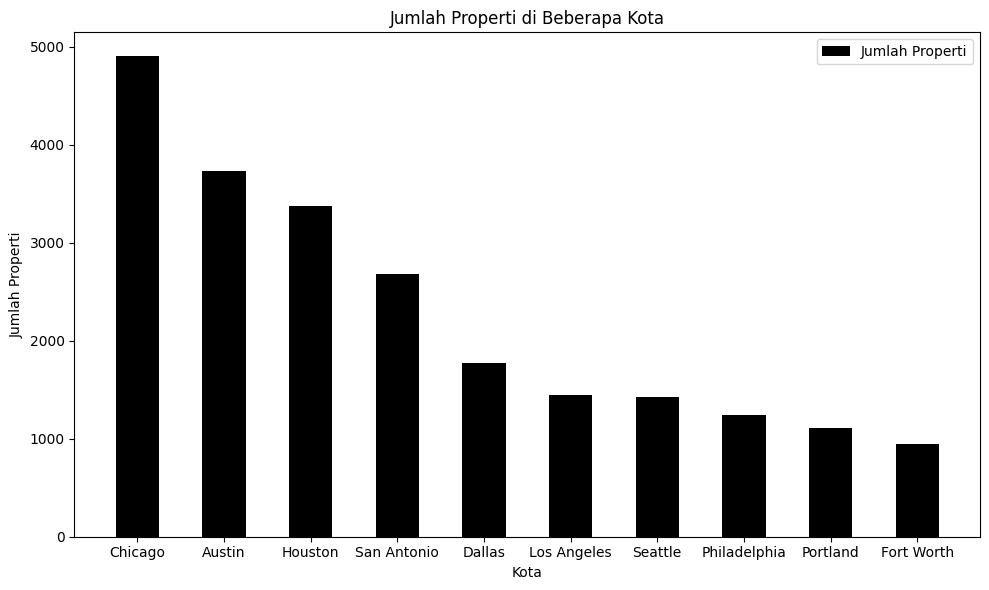

In [12]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import numpy as np

# Menghitung jumlah properti berdasarkan kota
grouped_data = df['City'].value_counts().head(10)  # Ambil 10 kota pertama
labels = grouped_data.index
kategori_values = []

# Menghitung jumlah properti untuk setiap kota
for kota in labels:
    jumlah_properti = df[df['City'] == kota]['Price'].count()  # Menghitung jumlah properti di kota
    kategori_values.append(jumlah_properti)

# Lebar bar
lebar_bar = 0.5

# Set posisi untuk bar
x = np.arange(len(labels))  # Posisi grup pada sumbu x yg akan ditampilkan

# Buat bar untuk setiap kategori
fig, ax = plt.subplots(figsize=(10, 6)) # membuat ukuran grafik

# Plot setiap kategori
ax.bar(x, kategori_values, lebar_bar, label='Jumlah Properti', color='black') # buat grafik batang dgn nilai kategori, menetapkan label dan warna

# Tambahkan label
ax.set_xlabel('Kota')
ax.set_ylabel('Jumlah Properti')
ax.set_title('Jumlah Properti di Beberapa Kota')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Tambahkan legenda
ax.legend()

# Tampilkan plot
plt.tight_layout() # mengoptimalkan grafik agar tidak bertumpukan
plt.show() # menampilkan hasil grafik

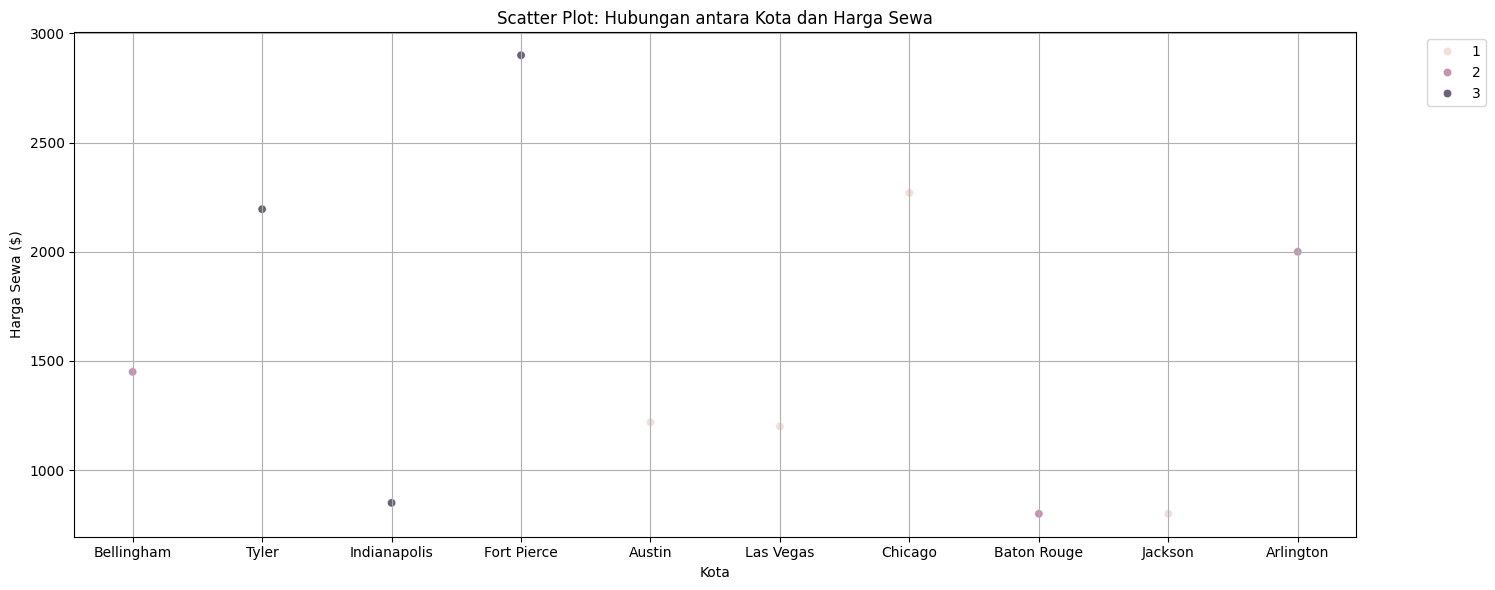

In [13]:
import pandas as pd
from pyspark.sql import SparkSession
import seaborn as sns

# Menghapus simbol dolar dan koma, lalu mengubah tipe data harga menjadi float
df['Price'] = df['Price'].replace({'\$': '', ',': '', ' ': ''}, regex=True).astype(float)

# Mengambil sampel 100 data untuk menghindari ukuran gambar yang terlalu besar
df_sample = df.sample(n=10, random_state=1)

# Membuat diagram pencar
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_sample, x='City', y='Price', hue='Beds', alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot: Hubungan antara Kota dan Harga Sewa')
plt.xlabel('Kota')
plt.ylabel('Harga Sewa ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Membaca dataset
data = pd.read_csv('/content/Rental_Properties.csv')

# Menghapus karakter dolar dan spasi dari kolom 'Price'
data['Price'] = data['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Memilih fitur (X) dan target (y)
X = data[['Beds', 'Baths', 'Sqft', 'Security_Deposit']]  # Anda bisa menambahkan fitur lain jika perlu
y = data['Price']

# Mengubah variabel kategorikal menjadi numerik
X = pd.get_dummies(X, drop_first=True)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung dan menampilkan MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Menampilkan beberapa prediksi
predictions = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions.head())

Mean Squared Error: 156438.62365259088
       Actual Price  Predicted Price
62329        1640.0      1458.271857
64526        1675.0      1726.049086
47502        1400.0      1637.725197
37973        1285.0      1178.815496
74028        1850.0      1951.967134
